In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

In [4]:
mnist_bldr= tfds.builder('mnist')
mnist_bldr.download_and_prepare()
datasets= mnist_bldr.as_dataset(shuffle_files= False)
mnist_train_orig= datasets['train']
mnist_test_orig= datasets['test']

In [6]:
BUFFER_SIZE= 10000
BATCH_SIZE= 64
NUM_EPOCHS= 20
mnist_train= mnist_train_orig.map(lambda item:(tf.cast(item['image'], tf.float32)/255.0, tf.cast(item['label'],tf.int32)))
mnist_test= mnist_test_orig.map(lambda item:(tf.cast(item['image'], tf.float32)/255.0, tf.cast(item['label'],tf.int32)))
tf.random.set_seed(1)
mnist_train= mnist_train.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration= False)
mnist_valid=mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train= mnist_train.skip(10000).batch(BATCH_SIZE)

In [7]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5), strides=(1,1), padding='same',data_format='channels_last',name='conv_1',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),name='pool_1'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5),strides=(1,1), padding='same',name='conv_2',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),name='pool_2'))

In [8]:
model.compute_output_shape(input_shape=(16,28,28,1))

TensorShape([16, 7, 7, 64])

In [9]:
model.add(tf.keras.layers.Flatten())
model.compute_output_shape(input_shape=(16,28,28,1))

TensorShape([16, 3136])

In [10]:
model.add(tf.keras.layers.Dense(units=1024,name='fc_1',activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=10,name='fc_2',activation='softmax'))

In [11]:
tf.random.set_seed(1)
model.build(input_shape=(None,28,28,1))
model.compile(optimizer=tf.keras.optimizers.Adam(),loss= tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [12]:
history= model.fit(mnist_train, epochs=NUM_EPOCHS, validation_data= mnist_valid, shuffle= True)

Epoch 1/20
782/782 [==============================] - 51s 65ms/step - loss: 0.1373 - accuracy: 0.9573 - val_loss: 0.0465 - val_accuracy: 0.9861
Epoch 2/20
782/782 [==============================] - 58s 75ms/step - loss: 0.0452 - accuracy: 0.9860 - val_loss: 0.0427 - val_accuracy: 0.9875
Epoch 3/20
782/782 [==============================] - 66s 84ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0431 - val_accuracy: 0.9870
Epoch 4/20
782/782 [==============================] - 66s 84ms/step - loss: 0.0233 - accuracy: 0.9928 - val_loss: 0.0340 - val_accuracy: 0.9904
Epoch 5/20
782/782 [==============================] - 63s 80ms/step - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0376 - val_accuracy: 0.9905
Epoch 6/20
782/782 [==============================] - 64s 81ms/step - loss: 0.0157 - accuracy: 0.9945 - val_loss: 0.0483 - val_accuracy: 0.9882
Epoch 7/20
782/782 [==============================] - 67s 85ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.0379 - val_accuracy:

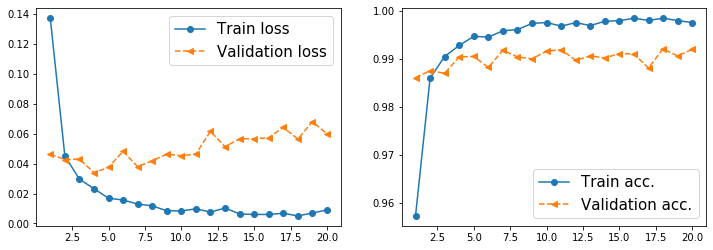

In [13]:
import matplotlib.pyplot as plt
hist= history.history
x_arr= np.arange(len(hist['loss']))+1
fig= plt.figure(figsize=(12,4))
ax= fig.add_subplot(1,2,1)
ax.plot(x_arr,hist['loss'],'-o',label='Train loss')
ax.plot(x_arr,hist['val_loss'], '--<',label='Validation loss')
ax.legend(fontsize=15)
ax= fig.add_subplot(1,2,2)
ax.plot(x_arr,hist['accuracy'],'-o',label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<',label= 'Validation acc.')
ax.legend(fontsize=15)
plt.show()

In [14]:
batch_test= next(iter(mnist_test.batch(12)))
preds= model(batch_test[0])
tf.print(preds.shape)

TensorShape([12, 10])


In [15]:
preds= tf.argmax(preds,axis=1)
print(preds)

tf.Tensor([2 0 4 8 7 6 0 6 3 1 8 0], shape=(12,), dtype=int64)


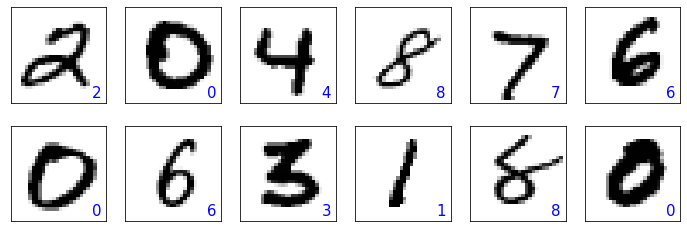

In [16]:
fig= plt.figure(figsize=(12,4))
for i in range(12):
    ax= fig.add_subplot(2,6,i+1)
    ax.set_xticks([]) ; ax.set_yticks([])
    img= batch_test[0][i,:,:,0]
    ax.imshow(img,cmap='gray_r')
    ax.text(0.9,0.1,'{}'.format(preds[i]), size=15, color='blue',horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
plt.show()

<module 'tensorflow' from '/opt/anaconda3/lib/python3.7/site-packages/tensorflow/__init__.py'>